# Predicting Bitcoin Prices: A Data-Driven Approach to Crypto Trends 🚀📈

# Introduction

Bitcoin, the world's leading cryptocurrency, has shown extreme volatility over the years. Investors and analysts constantly seek ways to predict its price movements using data-driven approaches. In this article, we'll explore how to analyze Bitcoin price trends using Exploratory Data Analysis (EDA), statistical methods, and a simple predictive model.

We'll use Python and the Bitcoin Price Dataset from Kaggle, covering historical price movements. By the end, you'll understand key insights about Bitcoin's price trends and learn how to apply predictive modeling.

# Step 1: Load the Dataset

### First, download the dataset from Kaggle and load it into Python.
Dataset Link: https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset?utm_source=chatgpt.com

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("bitcoin_2017_to_2023.csv")

# Display first few rows
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


Common columns in Bitcoin price datasets:

- Date/Time: The timestamp of the recorded price.
- Open, High, Low, Close (OHLC): Prices during different time frames.
- Volume: Total number of transactions in a given period.

# Step 2: Data Understanding and Cleaning

### Before diving into analysis, let's explore the dataset.

In [3]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [4]:
# Summary statistics
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


### Handling Missing Values

We fill missing values using forward-fill to maintain data continuity.

In [6]:
# Convert date column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Step 3: Exploratory Data Analysis (EDA)

### Visualizing Bitcoin Price Trends

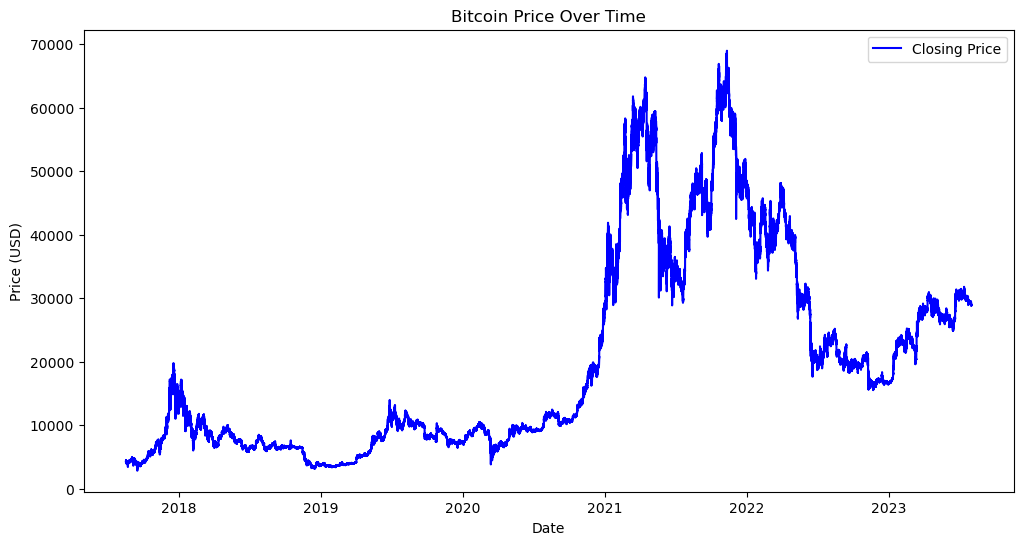

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()

### Daily Returns Distribution

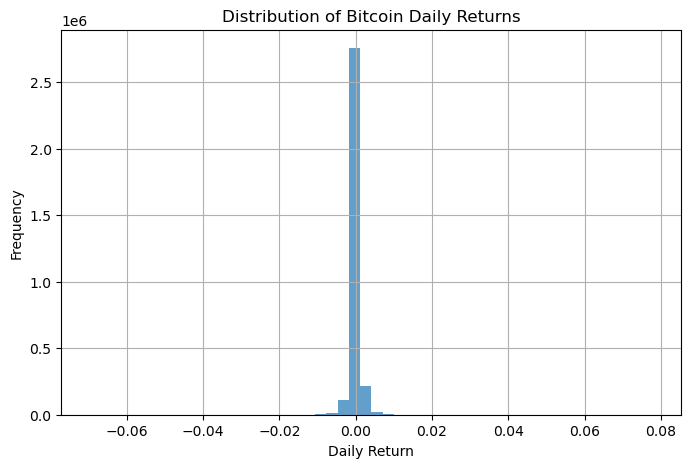

In [11]:
df['Daily Return'] = df['close'].pct_change()
plt.figure(figsize=(8, 5))
df['Daily Return'].hist(bins=50, alpha=0.7)
plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Step 4: Moving Averages for Trend Analysis

### Moving averages smooth out price fluctuations to identify trends.

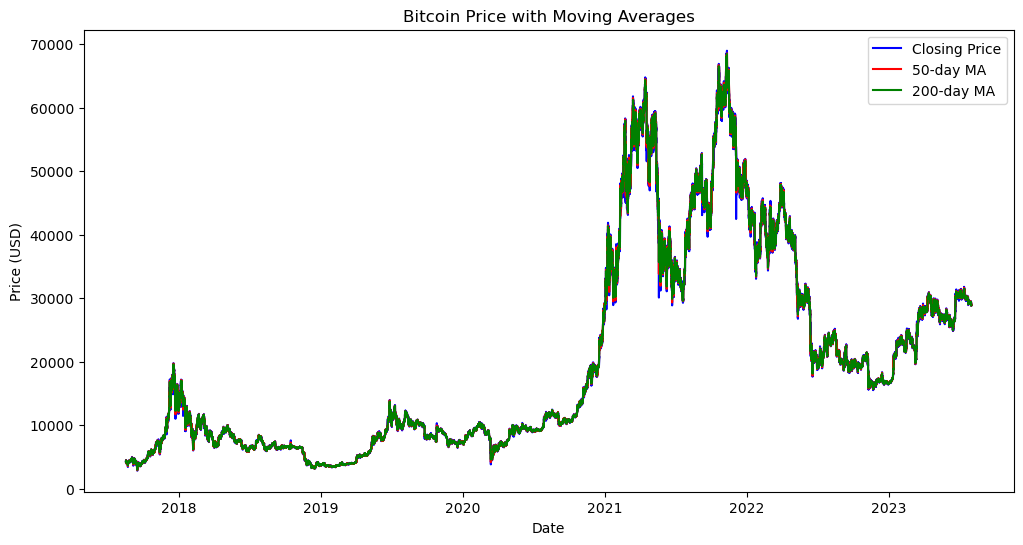

In [13]:
# Calculate Moving Averages
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label="Closing Price", color='blue')
plt.plot(df['timestamp'], df['MA_50'], label="50-day MA", color='red')
plt.plot(df['timestamp'], df['MA_200'], label="200-day MA", color='green')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price with Moving Averages")
plt.legend()
plt.show()

# Step 5: Correlation Analysis

### Let’s examine relationships between price and volume.

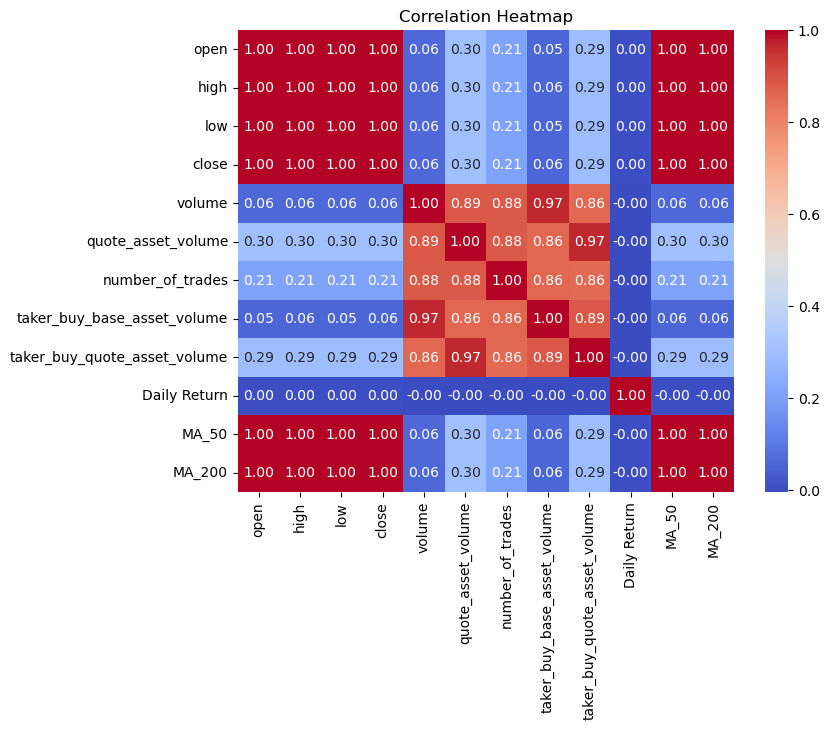

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Simple Predictive Model

### We'll use Linear Regression to predict Bitcoin's price based on historical trends.

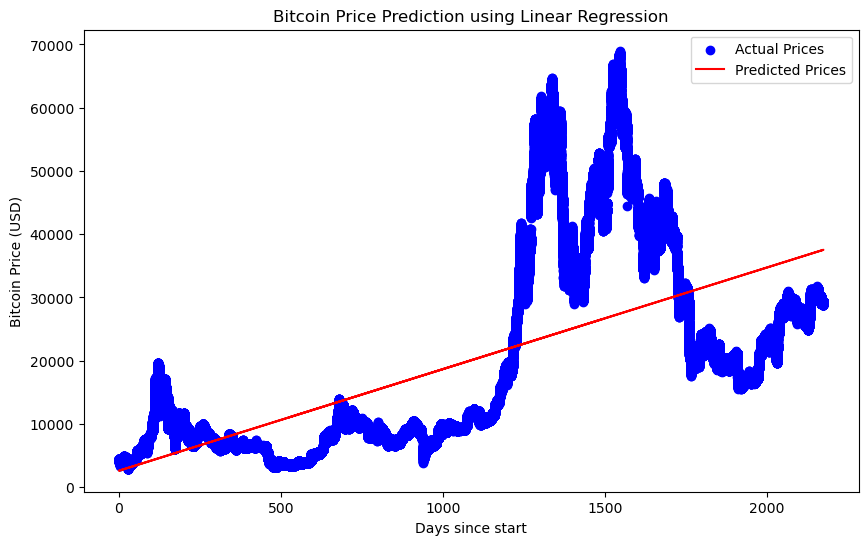

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert dates to numeric days since start
df['Days'] = (df['timestamp'] - df['timestamp'].min()).dt.days
X = df[['Days']]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot Predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', label="Predicted Prices")
plt.xlabel("Days since start")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Prediction using Linear Regression")
plt.legend()
plt.show()

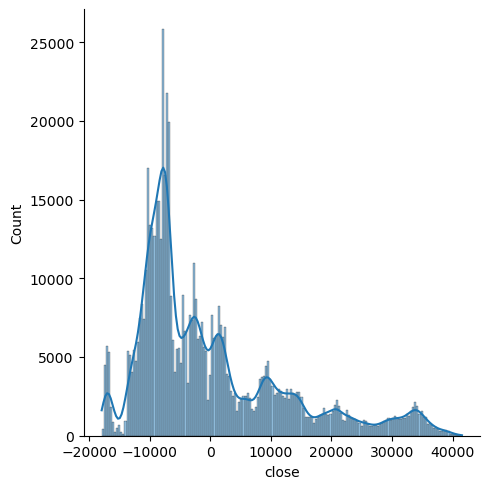

In [18]:
sns.displot((y_test-y_pred), kde=True)

In [22]:
from sklearn import metrics
print('MAE ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE  9812.94312732686
MSE  156391499.1181766
RMSE  12505.658683898926


# Conclusion

In this article, we:

- Loaded and cleaned Bitcoin price data

- Explored historical price trends using EDA

- Analyzed correlations and moving averages

- Built a simple predictive model using Linear Regression

The model demonstrates considerable room for improvement. The relatively high MAE, MSE, and RMSE values suggest that the model is struggling to predict Bitcoin's price with high accuracy. It would be beneficial to try more advanced models like a classical time series model ARIMA (AutoRegressive Integrated Moving Average) or a deep larning model LSTM (Long Short-Term Memory) to better capture the temporal patterns inherent in Bitcoin price movements.

If you found this insightful, share your thoughts in the comments below! 📝